Podczas wybierania datasetu Water Potability, zauważyliśmy już przy pierwszym spojrzeniu, że posiada znaczącą liczbę brakujących argumentów.

In [1]:
from pandas import read_csv
from numpy import nan
dataset = read_csv('water_potability.csv')
print(dataset.describe())
print(dataset.head(20))

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


Postanowiliśmy w związku z tym przyjrzeć się bliżej zjawisku, żeby zrozumieć jego skalę oraz stwierdzić, czy może stanowić dla nas potencjalny problem.

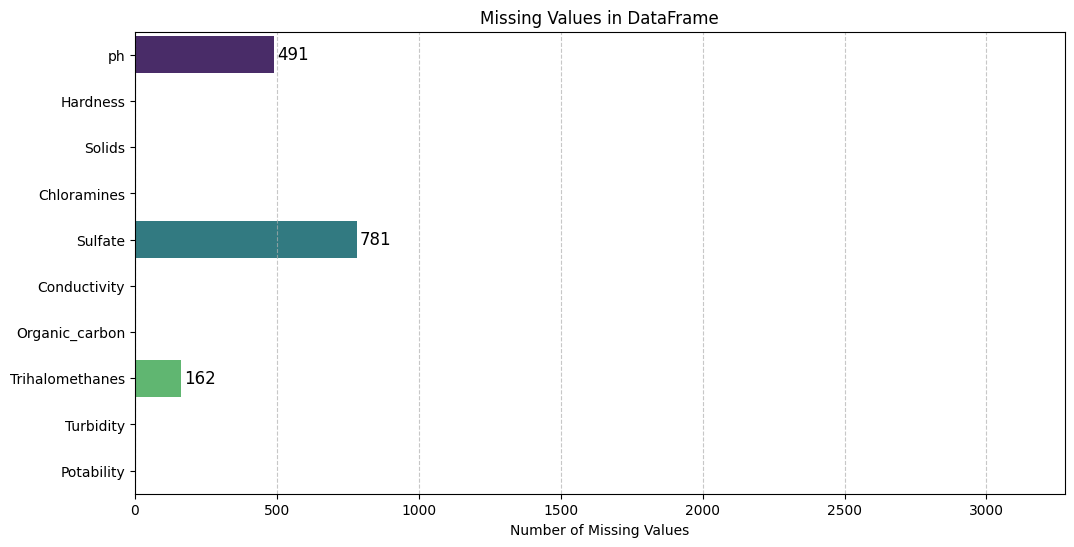

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = dataset.isnull().sum()
num_rows, _ = dataset.shape

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')
plt.xlabel('Number of Missing Values')
plt.title('Missing Values in DataFrame')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, num_rows)

for i, count in enumerate(missing_values):
  if(count == 0):
    continue
  plt.text(count + 10, i, str(count), va='center', fontsize=12)
plt.show()

Jak widać, problem jest znaczący: prawie 25% samej kolumny Sulfate nie posiada potrzebnych nam wartości, co może znacząco obniżyć skuteczność jakiegokolwiek przyszłego modelu sporządzonego na podstawie tych danych. W związku z tym, pierwszym problemem jaki przyszło nam rozwiązać jest problem brakujących danych, dla którego sporządziliśmy 3 poniższe rozwiązania.

Najprostszym rozwiązaniem problemu jest po prostu usunięcie wierszy z brakującymi rekordami. Jednakże w rezultacie jego zastosowania, tracimy ponad 33% naszego datasetu, co może doprowadzić do bardziej niezbalansowanych klas, bądź utraty pewnych cech naszych danych.

In [3]:
dataset_drop = read_csv('water_potability.csv')
dataset_drop.dropna(inplace=True)

num_missing = dataset.isnull().sum()
print(num_missing)
print(dataset_drop.describe())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587067     8.109726   359.330555   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  


In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

values = dataset_drop.values
X = values[:,0:9]
y = values[:,9]

model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=3, shuffle=True, random_state=1)

result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.593


Naszym drugim rozwiązaniem było uzupełnienie brakujących wartości korzystając ze średnich wartości poszczególnych kolumn. W ten sposób jesteśmy w stanie utrzymać w naszym datasecie wszystkie rekordy, choć tracimy w ten sposób na dokładności pomiarów.

In [5]:
# Calculate the average for each colum
column_averages = dataset.mean()

# Fill missing values in each column with its corresponding average
df_filled = dataset.fillna(column_averages)

num_missing = df_filled.isnull().sum()
print(num_missing)
print(df_filled.describe())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000 

In [6]:
values = df_filled.values
X = values[:,0:9]
y = values[:,9]

model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=3, shuffle=True, random_state=1)

result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.610


Finalnym rozwiązaniem było użycie biblioteki sklearn w celu skorzystania z funcjonalności Impute, która za pomocą wartości pozostałych kolumn, oblicza brakującą wartość. W naszym przypadku skorzystaliśmy z metody KNN, implementowanej przez KNNImputer.

In [7]:
from sklearn.impute import KNNImputer
from pandas import DataFrame
imputer = KNNImputer(n_neighbors=4, weights="uniform")
dataset_knn = DataFrame(imputer.fit_transform(dataset))
dataset_knn.columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
num_missing = dataset_knn.isnull().sum()
print(num_missing)
print(dataset_knn.describe())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.075520   196.369496  22014.092526     7.122277   333.569443   
std       1.505125    32.879761   8768.570828     1.583085    37.698572   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.168301   176.850538  15666.690297     6.127421   312.055610   
50%       7.039150   196.967627  20927.833607     7.130299   333.173676   
75%       7.959669   216.667456  27332.762127     8.114887   355.610137   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000 

In [8]:
values = dataset_knn.values
X = values[:,0:9]
y = values[:,9]

model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=3, shuffle=True, random_state=1)

result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.610


Postanowiliśmy dołączyć też eksperymentalne rozwiązanie i skorzystać z IterativeImputer sklearn, który póki co znajduje się w gałęzi eksperymentalnej. Stosuje on regresję, próbując oszacować brakującą wartość wiersza na podstawie argumentów znajdujących się w pozostałych kolumnach.

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=25, random_state=0)
dataset_iter = DataFrame(imp.fit_transform(dataset))
dataset_iter.columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
num_missing = dataset_iter.isnull().sum()
print(num_missing)
print(dataset_iter.describe())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080140   196.369496  22014.092526     7.122277   333.785030   
std       1.471573    32.879761   8768.570828     1.583085    36.387826   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   316.140728   
50%       7.062162   196.967627  20927.833607     7.130299   334.045574   
75%       7.870050   216.667456  27332.762127     8.114887   350.592000   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000 

In [10]:
values = dataset_iter.values
X = values[:,0:9]
y = values[:,9]

model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=3, shuffle=True, random_state=1)

result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.610


Jak widzimy, rezultaty ostatnich trzech rozwiązań przy zastosowaniu w algorytmie Linear Discriminant Analysis są sobie identyczne, jednakże, w porównaniu do pierwszej metody odrzucania brakujących wyników, widzimy poprawę w dokładności modelu. Choć więc zatem estymowanie poprawnej wartości brakujących argumentów nie jest idealnym rozwiązaniem, daje jednak lepsze efekty, niż po prostu odrzucenie na wejściu brakujących argumentów.